In [1]:
from src.data.data_management import DataManagement
from src.NN_model.NeuralNetworkModel import NeuralNetworkModel
from src.NN_model.basic_metrics import basic_metrics
from src.vis.visualize import Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

# Neural Network from scratch (using only numpy) - simple model for cat images predictions
In this project I've built Neural Network model from scratch - in this notebook I present functionality of its first version:
- model works for any number of hidden layers and units
- activation functions: sigmoid, ReLU and tanh
- fixed learning rate


This notebook provides overall analysis and example of usage of my first Neural Network model that was build by me from scrach.
The model can be found in <em>src/NN_model/NeutralNetworkModel</em>

## Let's take a look at dataset
First of all let's take a look at data. This dataset contains pictures which are labeled as cat (1) or not a cat (0). Let's see one random example.

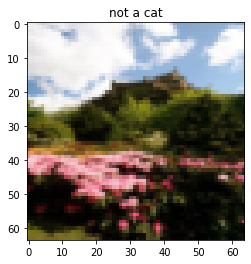

In [2]:
example_data, example_label, _, _ = DataManagement.load_dataset("data/cats/raw", vectorize=False, normalize=False)
r = np.random.choice(len(example_data))

plt.title("cat" if example_label[r]==1 else "not a cat")
plt.imshow(example_data[r])
plt.show()

Originally, the data set stores images in matrices 64x64x3 and labes as an array (no dimension at all). What is more, RGB channels format has a range 0-255.

In [3]:
print(f"Dimensions and resolution of images: {example_data[r].shape}")
print(f"Dimensions of stored labels: {example_label[r].shape}")
print(f"Range of a random example: {np.ptp(example_data[r])}")

Dimensions and resolution of images: (64, 64, 3)
Dimensions of stored labels: ()
Range of a random example: 255


## Preprocessing of a dataset - vectorization and normalization
In the next step I will vectorize my features - earlier it was stored in 3D array, but now every example will be stored as a column vector. Labels will be stored as vectors as well. What is more, the features will be normalized - in this case all the values will be divided by 255, so new range is between 0 and 1. This operations are provided in DataManagement class during import of a data. So, let's one more time import data, with those options turned on.

In [4]:
train_x, train_y, test_x, test_y = DataManagement.load_dataset("data/cats/raw", vectorize=True, normalize=True)

In [5]:
print(f"Training set shape: {train_x.shape}")
print(f"Training set labels shape: {train_y.shape}")
print(f"Range of a random example: {np.ptp(train_x[r])}")

Training set shape: (12288, 209)
Training set labels shape: (1, 209)
Range of a random example: 1.0


So now, a variable train_x stores 12288 features (pixels represented as a colum vector) for every each of 209 examples.

<strong>Requirements for</strong> a NeuralNetworkModel <strong>input</strong>:
- features stored in rows (number of features = number of rows)
- examples are stored in colums (numbers of examples = number of columns)

## Training a model
### Specifying hidden layers dimensions, activation functions and learning rates
To train NN model, some basic hyperparameters have to be defined. Those hyperparameters include, but are not limited to: hidden layers dimensions, activtion functions and learning rates. Hidden layers dimensions and learning rates can be easily specified by user, but lets take a look what we can choose if it comes to activation functions (in this project I specified this parameter as a <em><strong>activation</strong></em>)

In [6]:
NeuralNetworkModel.get_activators()

('sigmoid', 'relu', 'tanh')

In a cell below I've specified parameters that will be used for training a neural network.

**Note**: First layer and last layer are specified automatically while the model is being trained. It is because:
- first layer = input layer. Number of nodes in those layers are equal to number of input features (of X)
- last layer = output layer. Number of nodes in last layer is equal to number of output classes (of Y)

In [7]:
hidden_layers_dims = [20, 7, 5]
activators = ["relu", "sigmoid", "tanh"]
rates = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]

### Training and saving a model
- To train our model we also have to specify a number of iterations. What is more, there is a possbility to print a cost function after as many iteration as you want - it can be specified in <em>print_cost</em> parameter, value 0 prints only cost of a last iteration.
- When the model is trained (<em><strong>fit</strong></em> method) - object of a NeuralNetworkModel class will store all its parameters (those defined by a user and those learnt ones). It will be shown how to get those information later on.
- in the last step a method <em><strong>save_model</strong></em> from DataManagemet class saves model in a pickle format in a specified location - in this example <em>"data/cats/final_models"</em>

<strong>Note</strong>: it takes about 2-3 minutes to train one model. Since we have 21 models to train, running a cell below might take some time. Learned models are already provided in <em>"data/cats/final_models"</em>, so you don't have to wait, just don't run a cell below, but if you want to see how model is being trained, you are welcome.

In [8]:
for activ in activators:
    for rate in rates:
        print(f"Now training a model with {activ} activation and learning rate {rate}")
        model = NeuralNetworkModel(hidden_layers_dims, num_iteration=3000,
                                   activation = activ, learning_rate=rate, save_costs=100)
        model.fit(train_x, train_y)
        DataManagement.save_model("data/cats/final_models", name=f"model_{activ}_{rate}", model=model)

Now training a model with relu activation and learning rate 0.001
Cost after iteration 2999: 0.634020640830628
Now training a model with relu activation and learning rate 0.003
Cost after iteration 2999: 0.03343870433521733
Now training a model with relu activation and learning rate 0.01
Cost after iteration 2999: 0.005777943702263575
Now training a model with relu activation and learning rate 0.03
Cost after iteration 2999: 0.0015616400483682805
Now training a model with relu activation and learning rate 0.1
Cost after iteration 2999: 0.6439737380528037
Now training a model with relu activation and learning rate 0.3
Cost after iteration 2999: 0.6439737380528037
Now training a model with relu activation and learning rate 1
Cost after iteration 2999: 0.6439737380528038
Now training a model with sigmoid activation and learning rate 0.001
Cost after iteration 2999: 0.6492974645005374
Now training a model with sigmoid activation and learning rate 0.003
Cost after iteration 2999: 0.64373496

## Analysis of a performance
### Loading models
After training multiple models, those models were saved. It is a common pratice, because training a model is time and memory consuming. The first step is to load model - it will be done by using <em><strong>load_model</strong></em> method from <em>DataManagement</em> class.

Before we start loading all models, let's take a look at single model, to see how it is stored.

In [9]:
model_example = DataManagement.load_model("data/cats/final_models", name="model_relu_0.01")
print(model_example, type(model_example), sep="\n")

<class 'src.NN_model.NeuralNetworkModel.NeuralNetworkModel'>


As expected, loaded model is an object of an NeuralNetworkModel class. Let see what information can we get from <em><strong>get_info</strong></em> method

In [10]:
model_example.get_info()

Hidden layer dimensions: [20, 7, 5]
Input features: 12288
Number of output_classes: 1
Activation function: relu
Learning rate: 0.01
Iterations: 3000
L2: no
Dropout: no
Last cost: 0.01


**Now, let's load all the models.** Models and thier costs will be stored in pandas DataFrame. I decided to create a colum costs for the later (easlier) use in visualization step.

In [11]:
exported_models = None
for activ in activators:
    for rate in rates:
        temp_model = DataManagement.load_model("data/cats/final_models", name=f"model_{activ}_{rate}")
        if exported_models is None:
            exported_models = pd.DataFrame(columns=["models", "cost"], index=[[activ], [rate]])
        exported_models.loc[(activ, rate), "models"] =temp_model
        exported_models.loc[(activ, rate), "cost"] = temp_model.get_costs()

### Gradient visualization for different activation functions and learning rates
In the next step, we will take a look after performance of every each model. The are three graphs - each graph for each activation function. Those graphs also contains frames with legends - numbers in those frames specify a value of learning rate during training

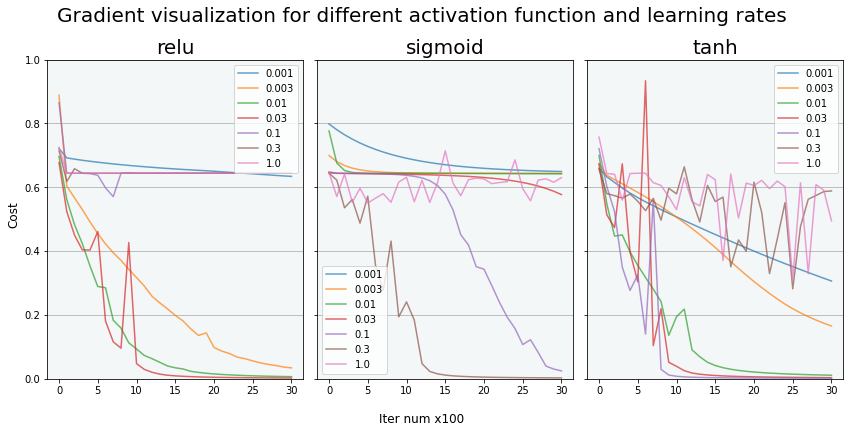

In [12]:
Visualization.gradient_visualization(exported_models.cost, 100,
                                     "Gradient visualization for different activation function and learning rates")

A model which minimize a cost function after each iteration (in this case after each 100 iterations) is a good candidate for a best model. What is more, after training, a cost function (cross entropy loss function) should have a small value.
After taking a look at graphs I choose following candidates:
- ReLu - learning rates: 0.01 and maybe 0.03
- sigmoind - learning rates: 0.3
- tanh - learning rates: 0.01, 0.03, 0.1

<strong>Note</strong>: a small value of a cost function can mean that model overfits the data, but we will talk about regularization in the next notebook

If we take a look at graph of tanh activation function, exacly waveform for a learnig rate 0.3 and 1, we can see that cost goes up and down. This is caused by too big learning rate - function fails to converge to minimum and oscilates around it. Even if this function manages to escape current local minimum surroundings, it will fail again at a different one.

### Metrics - accuracy, f1, precision, recall, ROC
Now, I will analyse models' performances. In each loop iteration, we will use learned earlier models. Methods <em>predit</em> and <em>predict_probas</em> will be performed on a train and test set to calculate basic metrics. Metrics for each model will be stored in DataFrame

In [13]:
metrics_train = None
metrics_test = None
for activ in activators:
    for rate in rates:
        preds_train = exported_models.loc[(activ, rate), "models"].predict(train_x)
        probas_train = exported_models.loc[(activ, rate), "models"].predict_proba(train_x)
        acc_metrics = basic_metrics(train_y, preds_train, probas_train)
        if metrics_train is None:
            metrics_train = pd.DataFrame(columns=acc_metrics.keys(), index=[[activ], [rate]], dtype=float)
        metrics_train.loc[(activ, rate), :] = acc_metrics
        
        preds_test = exported_models.loc[(activ, rate), "models"].predict(test_x)
        probas_test = exported_models.loc[(activ, rate), "models"].predict_proba(test_x)
        acc_metrics = basic_metrics(test_y, preds_test, probas_test)
        if metrics_test is None:
            metrics_test = pd.DataFrame(columns=acc_metrics.keys(), index=[[activ], [rate]], dtype=float)
        metrics_test.loc[(activ, rate), :] = acc_metrics

In [34]:
metrics_train

accuracy        f1  precision    recall       AUC
relu    0.001  0.665072  0.054054   1.000000  0.027778  0.608779
        0.003  1.000000  1.000000   1.000000  1.000000  1.000000
        0.010  1.000000  1.000000   1.000000  1.000000  1.000000
        0.030  1.000000  1.000000   1.000000  1.000000  1.000000
        0.100  0.655502  0.000000   0.000000  0.000000  0.500000
        0.300  0.655502  0.000000   0.000000  0.000000  0.500000
        1.000  0.655502  0.000000   0.000000  0.000000  0.500000
sigmoid 0.001  0.655502  0.000000   0.000000  0.000000  0.478102
        0.003  0.655502  0.000000   0.000000  0.000000  0.568127
        0.010  0.655502  0.000000   0.000000  0.000000  0.760239
        0.030  0.655502  0.000000   0.000000  0.000000  0.836273
        0.100  1.000000  1.000000   1.000000  1.000000  1.000000
        0.300  1.000000  1.000000   1.000000  1.000000  1.000000
        1.000  0.655502  0.000000   0.000000  0.000000  0.601683
tanh    0.001  0.956938  0.937063   0.943662  0.930556  0.979826
        0.003  0.980861  0.972222   0.972222  0.972222  0.986212
        0.010  1.000000  1.000000   1.000000  1.000000  1.000000
        0.030  1.000000  1.000000   1.000000  1.000000  1.000000
        0.100  1.000000  1.000000   1.000000  1.000000  1.000000
        0.300  0.885167  0.823529   0.875000  0.777778  0.946573
        1.000  0.669856  0.080000   1.000000  0.041667  0.873733

The dataframe above give information about how well model performs on a training set. If model is fitted perfecly to tranining set examples, it has high scores. Those high scores do not mean that model is "good", beacause it can has poor prediction on the data that it hasn't seen before. If it fits really badly, we can assume that it will still give poor results on a test set

In the **next step**, a heatmap will be displayed. A method <em>metrics_visualize</em> will display only those models, which <em>score</em> is higher than <em>threshold</em>. Let's display metrics of a test set

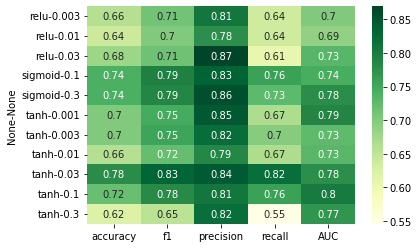

In [15]:
Visualization.metrics_visualize(metrics_test, score="f1", threshold=0.5)

As observed, many models overfits the data. It mean, they have nearly 100% accuracy (or other scores) on the train set, but they fail to generalize well outside known examples (i.e. test test). Overfitting can be fought with the usage of regularization, but we will get to that in the next notebook

In the last step, the <strong>best model</strong> will be used to predict a random sample from a test set. I choose best model with respect to best f1 score on a test set.

In [16]:
best_activ, best_learning_rate = metrics_test.f1.idxmax()
best_model = exported_models.loc[(best_activ, best_learning_rate), "models"]

The cell below will display basic info about best model.

In [36]:
bestf1 = np.round(metrics_test.f1[metrics_test.f1.idxmax()], 2)
print(f"The best f1 score {bestf1} for activation function {best_activ} and learning rate {best_learning_rate}")
best_model.get_info()

The best f1 score 0.83 for activation function tanh and learning rate 0.03
Hidden layer dimensions: [20, 7, 5]
Input features: 12288
Number of output_classes: 1
Activation function: tanh
Learning rate: 0.03
Iterations: 3000
L2: no
Dropout: no
Last cost: 0.0


Prediction on a random sample:

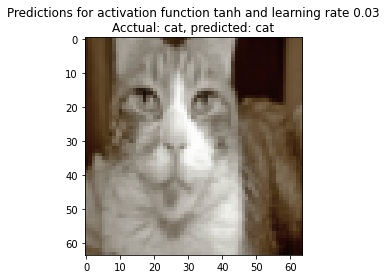

In [18]:
Visualization.predict_random_sample(best_model, test_x, test_y)

<strong> Summary:</strong>
- the best model f1 score on test set is 0.83. This is a pretty bad performance, due to the fact that a human will probably always correctly classify a picture as a cat / not a cat

- the same model had 100% f1 score on train set. This is an example of overfitting the data. Model learns/fits the data almost perfectly on training examples, but fails to generalize well on the data that it hasn't seen yet (test set). There is a cure for this situation - it is called regularization. It will be presented in notebook #2